<a href="https://colab.research.google.com/github/rym-sanaa/GIT-HUB-/blob/main/Linear_Multi_linear_Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the needed packages 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [ ]:
#read and explore the data 
df=pd.read_csv('/content/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#@title Let's get more information about the statistical distribution of the numerical vatiables in our data set.

In [ ]:

#get more information about the statistical distribution of the numerical vatiables in our data set.

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#informations about our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#let's have a glance of the diffrent columns we have 
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#the number of lines and columns
df.shape

(21613, 21)

In [ ]:
#cheking for any missing values in the data set 
df.isnull().sum().sum()

0

In [ ]:
#@title 1.1 let's apply some univariate exploration on the price (Our Target value)

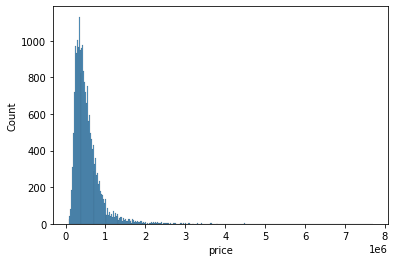

In [ ]:
sns.histplot(df['price'])

In [ ]:
#@title 1.2 let's apply some Bivariate exploration between the price (Target) and other features to better understand our data.
#let's apply some Bivariate exploration between the price (Target) and other features to better understand our data.

In [ ]:
#@title The Impact of the numerical data on our Target

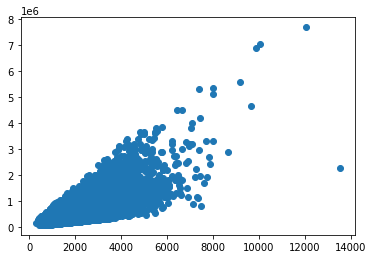

In [ ]:
plt.scatter(df['sqft_living'] , df['price'])

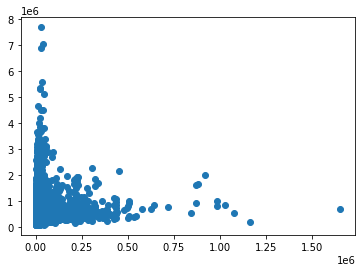

In [ ]:
plt.scatter(df['sqft_lot'] , df['price'])

In [ ]:
#@title The impact of the number of Categorical features on our target "the price" { form-width: "20%", display-mode: "form" }

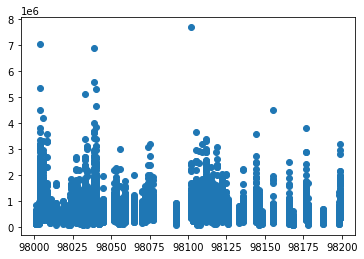

In [ ]:
plt.scatter(df['zipcode'] , df['price'])

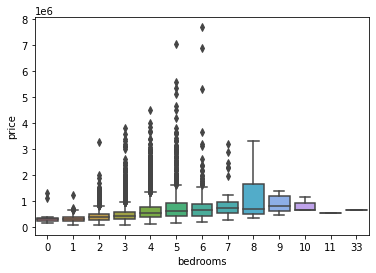

In [ ]:
#the number of bedrooms 
sns.boxplot( data = df , x='bedrooms' , y='price')

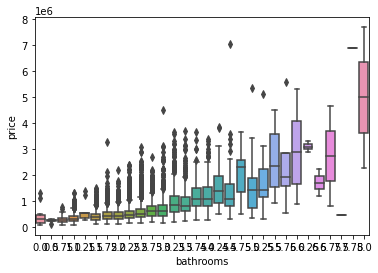

In [ ]:
#the impact of the number of bathrooms

sns.boxplot( data = df , x='bathrooms' , y='price')

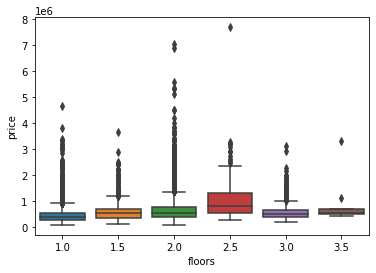

In [ ]:
sns.boxplot( data = df , x='floors' , y='price')

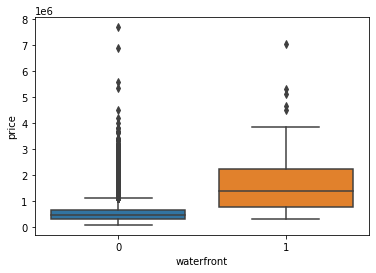

In [ ]:
#the impact of the waterfront

sns.boxplot( data = df , x='waterfront' , y='price')

In [ ]:
#the impact of the view 

sns.boxplot( data = df , x='view' , y='price')

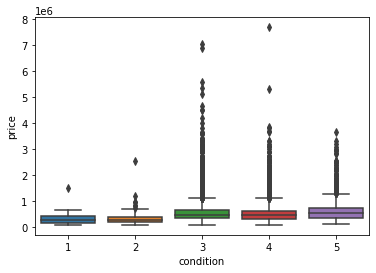

In [ ]:
#the impact of the house's condition
sns.boxplot( data = df , x='condition' , y='price')

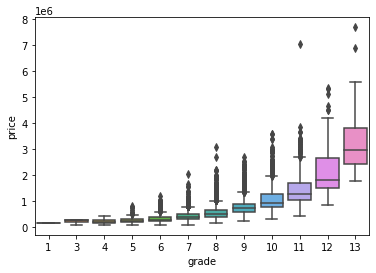

In [ ]:
#the impact of the house's grade

sns.boxplot( data = df , x='grade' , y='price')

In [ ]:
#@title 2.Features Selection

In [ ]:
#After studying the correlation between diffrent features and our target , it's quite clear that most import ones 
#are those which have shown a  significative proprosional variation with the price and those are :
# the surface of the living area, the surface of the flat, the number of bedrooms and bathrooms , the view ,   the water front and the grade.....other than that features like the floor and the conditions have shown a very weak corraltion with the prices... and at the end we have features like the zip code the long and latitude which were unsignficative price ware 
 


In [ ]:
#@title 3.Data split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
#extract x and y from our data
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%



In [ ]:
x_train.shape, y_train.shape

((14048, 1), (14048,))

In [ ]:
x_test.shape, y_test.shape

((7565, 1), (7565,))

In [ ]:
#@title Applying linear regression

In [ ]:
#importing the needed packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance




In [ ]:
#@title 5.Let's measure the performance

In [ ]:
print("Mean squared error (MSE):", mean_squared_error(y_test,predicted))
print("Coefficient of determination ", metrics.r2_score(y_test,predicted))
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Mean squared error (MSE): 62902408306.86502
Coefficient of determination  0.4996528488387417
Coefficients: [284.00261205]
Intercept: -50697.9410763497


In [ ]:
#@title 5.2 Linear regression plot

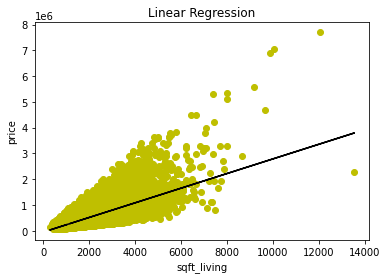

In [ ]:
plt.scatter(x,y,color="y")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [ ]:
#@title 6.Multi Linear regression

In [ ]:
#extract x and y from our data
x=df[['bedrooms' , 'bathrooms' , 'sqft_living' , 'view' , 'grade' , 'waterfront' , 'sqft_lot' ]]  #we have more than one input
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%


In [ ]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [ ]:
predicted.shape

(7565,)

In [ ]:
print("Mean squared error (MSE):", mean_squared_error(y_test,predicted))

print("Coefficient of determination R^2 ", metrics.r2_score(y_test,predicted))

print('Coefficients:', model.coef_)

print('Intercept:', model.intercept_)

Mean squared error (MSE): 51000874359.86904
Coefficient of determination R^2  0.5943216980150385
Coefficients: [-3.76104153e+04 -2.42672510e+04  2.11989881e+02  6.82230117e+04
  9.18173357e+04  6.21530840e+05 -3.26139081e-01]
Intercept: -441638.35383903293


In [ ]:
#@title Remark:

In [ ]:
#here we can see that adding all the ipacting features to the train set has bettred the performance of our model as both the mean squared error went down and the R^2 went higher.

In [ ]:
#@title 7.Polynomial Regression

In [ ]:
#let's get the needed packages 
from sklearn.preprocessing import PolynomialFeatures 


In [ ]:
x=df[['bedrooms' , 'bathrooms' , 'sqft_living' , 'view' , 'grade' , 'waterfront' , 'sqft_lot' ]]  #we have more than one input
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("Mean squared error (MSE):", mean_squared_error(y_test,predicted))

print("Coefficient of determination R^2 ", metrics.r2_score(y_test,predicted))

print('Coefficients:', model.coef_)

print('Intercept:', model.intercept_)

Mean squared error (MSE): 51075855267.15628
Coefficient of determination R^2  0.593725274374633
Coefficients: [-3.76104153e+04 -2.42672510e+04  2.11989881e+02  6.82230117e+04
  9.18173357e+04  6.21530840e+05 -3.26139081e-01]
Intercept: -441638.35383903293


In [ ]:
#@title Remark: 
Remark :

In [ ]:
#we've noticed that applying the polynominal regression didn't really enhance our results with induces the conculuuion that our data doesn't have a polynomial distribution.